# Donor Classification

## Problem Statement
> Predict individual with salary above \$50000 per annum


## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import IPython.display as display

## Data Exploration

In [2]:
raw_df = pd.read_csv("census.csv")
display(raw_df.head())

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [6]:
raw_df.shape

(45222, 14)

In [4]:
raw_df.describe(include="O")

,workclass,education_level,marital-status,occupation,relationship,race,sex,native-country,income
count,45222,45222,45222,45222,45222,45222,45222,45222,45222
unique,7,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,<=50K
freq,33307,14783,21055,6020,18666,38903,30527,41292,34014


In [5]:
raw_df.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,10.118460,1101.430344,88.595418,40.938017
std,13.217870,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [20]:
cat_feat_names = ["workclass", "education_level", "marital-status", "occupation", "relationship", "race", "sex",\
                  "native-country"]
num_feat_names = ["age", "education-num", "capital-gain", "capital-loss", "hours-per-week"]

## Exploratory Data analysis

In [64]:
def univ_plot(df, feature_name, horizontal_bar=False):
    if np.issubdtype(df[feature_name].dtype, np.number):
        plt.hist(df[feature_name])
        plt.xlabel(feature_name)
        plt.ylabel("Frequency")
        plt.xticks(rotation=70)
    else:
        if horizontal_bar:
            sb.countplot(data=df, y=feature_name)
        else: 
            sb.countplot(data=df, x=feature_name)
            plt.xticks(rotation=70)

### Target feature

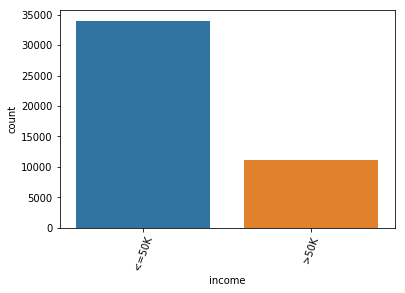

In [78]:
univ_plot(raw_df, "income")

### Other features

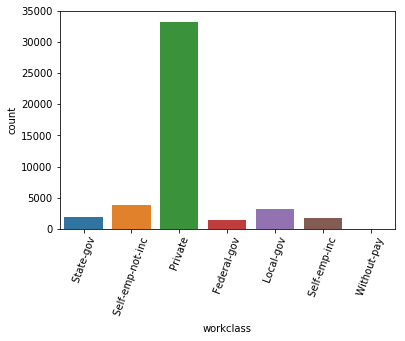

In [65]:
univ_plot(raw_df, cat_feat_names[0])

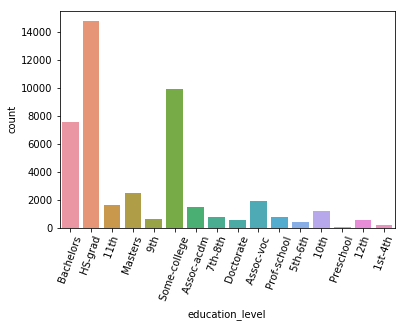

In [66]:
univ_plot(raw_df, cat_feat_names[1])

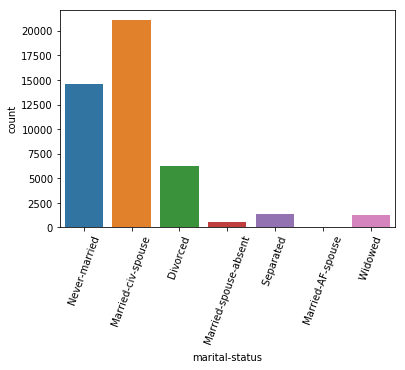

In [67]:
univ_plot(raw_df, cat_feat_names[2])

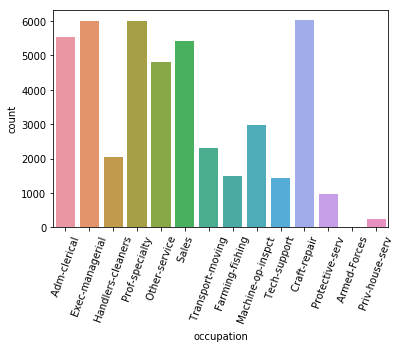

In [68]:
univ_plot(raw_df, cat_feat_names[3])

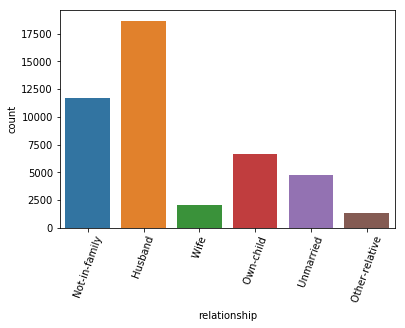

In [69]:
univ_plot(raw_df, cat_feat_names[4])

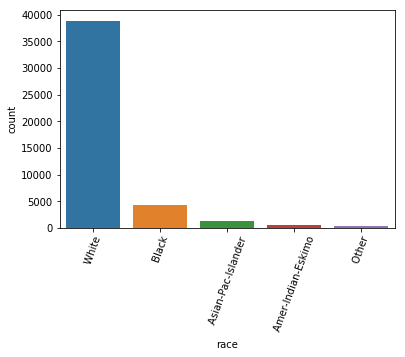

In [70]:
univ_plot(raw_df, cat_feat_names[5])

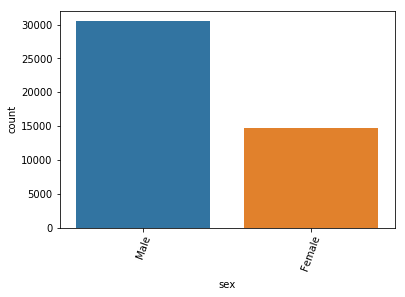

In [71]:
univ_plot(raw_df, cat_feat_names[6])

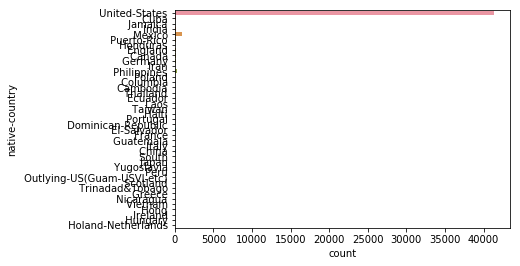

In [72]:
univ_plot(raw_df, cat_feat_names[7], horizontal_bar=True)

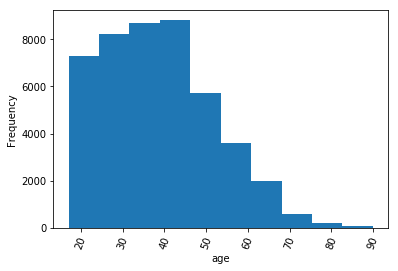

In [73]:
univ_plot(raw_df, num_feat_names[0])

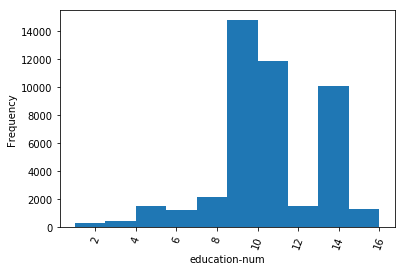

In [74]:
univ_plot(raw_df, num_feat_names[1])

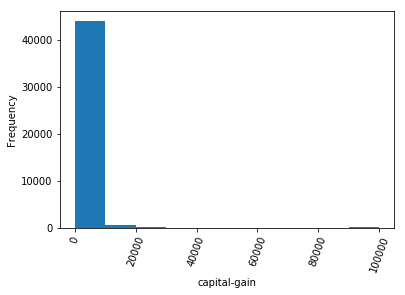

In [75]:
univ_plot(raw_df, num_feat_names[2])

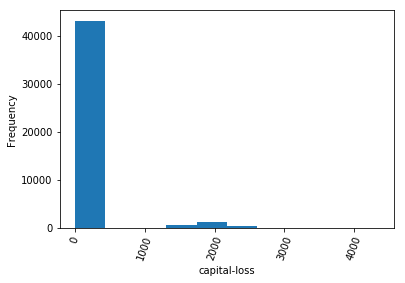

In [76]:
univ_plot(raw_df, num_feat_names[3])

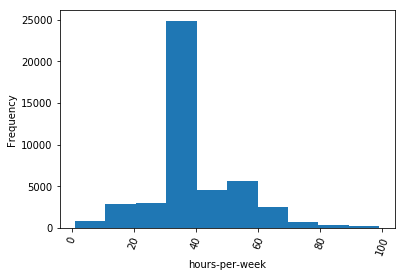

In [77]:
univ_plot(raw_df, num_feat_names[4])

## Observations


### Numerical
`age` - Continuous<br>
`education-num` - Continuous<br>
`capital-gain` - Continuous<br>
`capital-loss` - Continuous<br>
`hours-per-week` - Continuous<br>

### Categorical
`marital-status` - Nominal<br>
`occupation` - Nominal<br>
`relationship` - Nominal<br>
`race` - Nominal <br>
`sex` - Nominal<br>
`native-country` - Nominal<br>

* There are 45222 instances and 13 features excluding the target feature(`income`).
* Unique Values in categorical features
    > 7 unique workclasses<br>
    > 16 unique education levels<br>
    > 7 unique marital status values<br>
    > 14 unique occupation values<br>
    > 6 unique relationship values<br>
    > 5 unique race values<br>
    > 2 unique sex values<br>
    > 41 unique native country values<br>
    
### Most frequent feature values
<table>
<th>Feature Name</th>
<th>Most frequent value</th>
<th>Number of instaces</th>
<tr>
    <td>workclass</td>
    <td>Private</td>
    <td>33307</td>
</tr>
</table>

### Range of numerical values

<table>
    <th>Feature Name</th>
    <th>Maximum</th>
    <th>Minimum</th>
    <tr>
        <td>age</td>
        <td>Private</td>
        <td>33307</td>
    </tr>
    <tr>
        <td>education-num</td>
        <td>Private</td>
        <td>33307</td>
    </tr>
    <tr>
        <td>captial-loss</td>
        <td>Private</td>
        <td>33307</td>
    </tr>
    <tr>
        <td>capital-gain</td>
        <td>Private</td>
        <td>33307</td>
    </tr>
    <tr>
        <td>hours-per-week</td>
        <td>Private</td>
        <td>33307</td>
    </tr>
</table>

#### Dsitribution
* capital-loss and capital-gain features seem to have a lot of values withing a small range and there are very less instances with other values.
* age feature seems to be right skewed
* The range of numerical features seem to drastically different from each other.
    



### Preprocessing Steps

<ul>
    <li>log transformation can be applied to capital-loss to remove effects of skew.</li>
    <li>log transformation can be applied to capital-gain to remove effects of skew.</li>
    <li>Perform feature scaling</li>